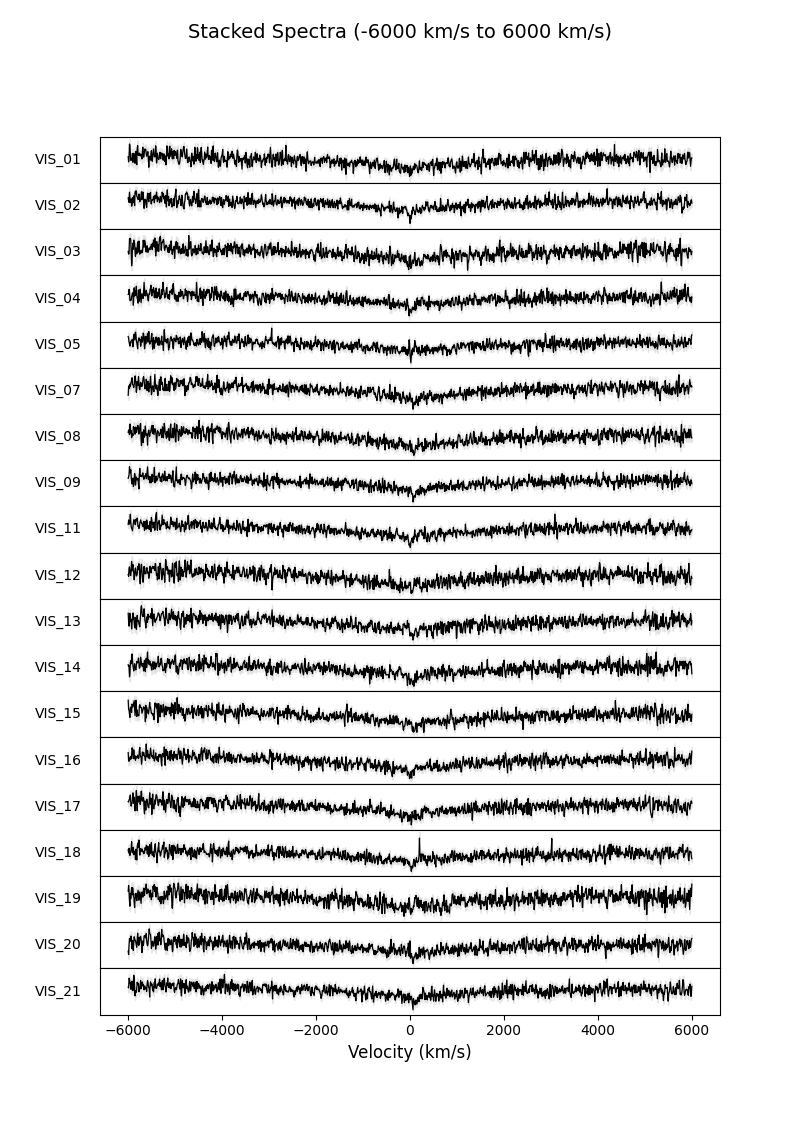

In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
c=2.998e5
def plot_stacked_spectra(file_list, min_v, max_v):
    %matplotlib widget
    n_files = len(file_list)
    fig, axes = plt.subplots(n_files, 1, figsize=(8, 0.6 * n_files), sharex=True)
    plt.subplots_adjust(hspace=0)  # Remove gaps between subplots

    for i, fitfile in enumerate(file_list):
        hdul = fits.open(fitfile)
        flux_data = hdul[0].data
        header = hdul[0].header
        flux_error = hdul[1].data
        start_wavelength_nm = header['CRVAL1']
        wavelength_step_nm = header['CDELT1']
        pixel_axis = np.arange(len(flux_data))
        wavelength_nm = start_wavelength_nm + (pixel_axis * wavelength_step_nm)
        wavelength_angstrom = wavelength_nm * 10
        velocity = c*(wavelength_angstrom-6562.76)/6562.76

    
        ax = axes[i]
        mask = (velocity >= min_v) & (velocity <= max_v)
        ax.plot(velocity[mask], flux_data[mask], color='black', linewidth=0.9)
        file_number = fitfile[4:6]
        ax.set_ylabel(f'VIS_{file_number}', fontsize=10, rotation=0, labelpad=30, va='center')
        ax.fill_between(velocity[mask], 
                     flux_data[mask] - flux_error[mask], 
                     flux_data[mask] + flux_error[mask], 
                     color='lightgrey', alpha=0.5)
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)


        
    axes[-1].set_xlabel('Velocity (km/s)', fontsize=12)
    plt.suptitle(f'Stacked Spectra ({min_v} km/s to {max_v} km/s)', fontsize=14)
    plt.savefig('stack.png', dpi=300, bbox_inches='tight')
    
    plt.show()

fits_files = [f'VIS_{i:02}.fits' for i in range(1, 22) if i not in [6,10]]

plot_stacked_spectra(fits_files, -6000, 6000)



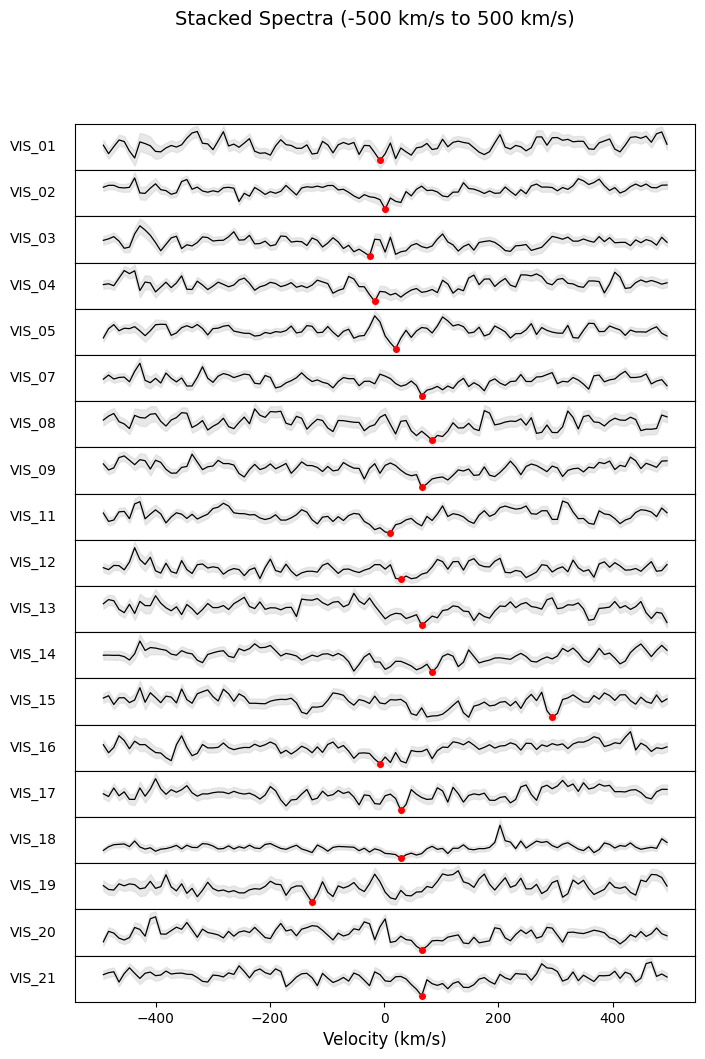

In [2]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

c = 2.998e5

def plot_stacked_spectra(file_list, min_v, max_v):
    n_files = len(file_list)
    fig, axes = plt.subplots(n_files, 1, figsize=(8, 0.6 * n_files), sharex=True)
    plt.subplots_adjust(hspace=0)  # Remove gaps between subplots
    for i, fitfile in enumerate(file_list):
        hdul = fits.open(fitfile)
        flux_data = hdul[0].data
        header = hdul[0].header
        flux_error = hdul[1].data
        start_wavelength_nm = header['CRVAL1']
        wavelength_step_nm = header['CDELT1']
        pixel_axis = np.arange(len(flux_data))
        wavelength_nm = start_wavelength_nm + (pixel_axis * wavelength_step_nm)
        wavelength_angstrom = wavelength_nm * 10
        velocity = c * (wavelength_angstrom - 6562.76) / 6562.76
        
        ax = axes[i]
        mask = (velocity >= min_v) & (velocity <= max_v)
        ax.plot(velocity[mask], flux_data[mask], color='black', linewidth=0.9)
        file_number = fitfile[4:6]
        ax.set_ylabel(f'VIS_{file_number}', fontsize=10, rotation=0, labelpad=30, va='center')
        ax.fill_between(velocity[mask], 
                        flux_data[mask] - flux_error[mask], 
                        flux_data[mask] + flux_error[mask], 
                        color='lightgrey', alpha=0.5)
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
        
#to find the minimum flux in the extracted region and mark it
        min_flux_index = np.argmin(flux_data[mask])

        core_velocity = velocity[mask][min_flux_index]
        core_flux = flux_data[mask][min_flux_index]
   
        ax.plot(core_velocity, core_flux, 'ro', markersize=4) 

    axes[-1].set_xlabel('Velocity (km/s)', fontsize=12)
    plt.suptitle(f'Stacked Spectra ({min_v} km/s to {max_v} km/s)', fontsize=14)
    plt.savefig('stack.png', dpi=300, bbox_inches='tight')
    
    plt.show()

fits_files = [f'VIS_{i:02}.fits' for i in range(1, 22) if i not in [6,10]]

plot_stacked_spectra(fits_files, -500, 500)